# Exploring the Data Available in Each API

In [1]:
import os
from dotenv import load_dotenv
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

## Mashvisor

In [2]:
# Authentication
# Define Authentication Headers
# --> Referenced Throughout this Notebook

# Load API Keys
load_dotenv()
X_RAPID_API_KEY = os.getenv("X_RAPID_API_KEY")
X_RAPID_API_HOST_MASHVISOR = os.getenv("X_RAPID_API_HOST_MASHVISOR")

# Headers include Authentication Keys

headers = {
    'x-rapidapi-key': X_RAPID_API_KEY,
    'x-rapidapi-host': X_RAPID_API_HOST_MASHVISOR
    }

## Short Term Rentals

### Get Listings
#### List all active short term rentals - Airbnb listings - for a specific location: city, zip code, or a neighborhood

In [3]:
# SHORT TERM RENTALS
# Build Query URL - Get Listings
# Free Limit of 4 Rows

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/airbnb-property/active-listings"

url = url_beginning + url_ending

querystring = {
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

# Build Dataframe

df = pd.DataFrame(json_response['content']['properties'])

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (4, 36)
Columns: Index(['id', 'property_id', 'source', 'status', 'night_priceـnative',
       'night_price', 'weekly_price', 'monthly_price', 'cleaning_fee_native',
       'num_of_baths', 'num_of_rooms', 'occupancy', 'nights_booked',
       'rental_income', 'airbnb_neighborhood_id', 'name', 'address',
       'airbnb_neighborhood', 'airbnb_city', 'state', 'capacity_of_people',
       'zip', 'property_type', 'room_type', 'room_type_category', 'amenities',
       'reviews_count', 'start_rating', 'reviews', 'created_at', 'updated_at',
       'num_of_beds', 'lat', 'lon', 'image', 'url'],
      dtype='object')


,id,property_id,source,status,night_priceـnative,night_price,weekly_price,monthly_price,cleaning_fee_native,num_of_baths,...,reviews_count,start_rating,reviews,created_at,updated_at,num_of_beds,lat,lon,image,url
0,25152172,11219540,Airbnb,ACTIVE,335,372,0,0,190,3,...,40,5,None,2020-10-31T21:59:36.000Z,2020-10-31T21:59:36.000Z,8,35.7301,-83.4592,https://a0.muscache.com/im/pictures/3e0cff88-f...,None
1,25152256,11414584,Airbnb,ACTIVE,140,132,0,0,85,1,...,302,5,None,2020-10-31T21:59:46.000Z,2020-10-31T21:59:46.000Z,2,35.7566,-83.4657,https://a0.muscache.com/im/pictures/1ccd481a-8...,None
2,25152395,11697936,Airbnb,ACTIVE,135,146,0,0,85,2,...,294,5,None,2020-10-31T22:00:03.000Z,2020-10-31T22:00:03.000Z,3,35.7436,-83.4847,https://a0.muscache.com/im/pictures/83d35763-4...,None
3,25152220,12407249,Airbnb,ACTIVE,99,94,0,0,60,1,...,176,5,None,2020-10-31T21:59:42.000Z,2020-10-31T21:59:42.000Z,1,35.7069,-83.5592,https://a0.muscache.com/im/pictures/1436c02a-c...,None


- Why only 4 Rows? -> Data Limitation or Account Limitation?

In [4]:
# TN ApiBnB Neighborhood ID
tn_nb_id = df['airbnb_neighborhood_id'][0]
tn_nb_id

18258

In [5]:
# Check for Cloud9
df['name'].str.contains('judy')

0    False
1    False
2    False
3    False
Name: name, dtype: bool

### Get Market Summary
#### Get a summary an overview for a specific Airbnb market location: city, zip code, or a neighborhood

In [6]:
# SHORT TERM RENTALS
# Build Query URL - Market Summary

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/airbnb-property/market-summary"

url = url_beginning + url_ending

querystring = {
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

content = json_response['content']

# Seems Like this is a Series of Histograms
# that describe a market
print('Availale Histograms for Gberg TN:')
list(json_response['content'].keys())

dict_keys(['listings_count', 'property_types', 'occupancy_histogram', 'night_price_histogram', 'rental_income_histogram', 'listings_ids'])

(array([141.,  14.,   0.,  27.,   0.,  17.,   3.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

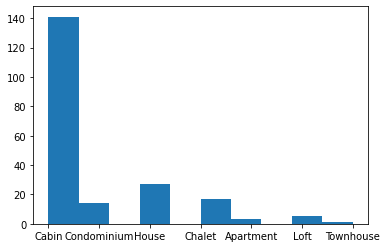

In [7]:
plt.hist(content['property_types']['histogram'])

**TODO:** Find n datapoints for each histogram.
- How is his count determined.
- What qualifies an example to be an observation in the histo?
    - Is it just all the data they have for a given market?

### Get Occupancy Rates
#### For each Airbnb listing, we calculate its occupancy rate, month per month, and an annual rate, and we offer our clients a 12-month historical performance for the occupancy rates. Market occupancy rates for a zip code or a neighborhood.

In [27]:
# SHORT TERM RENTALS
# Build Query URL - Get Airbnb Occupancy Rates

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/airbnb-property/occupancy-rates"

url = url_beginning + url_ending

querystring = {
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

content = json_response['content']

# Seems Like this is a Series of Histograms
# that display Occupany Rates against Bedroom Count
print("TODO: Look at Other Keys")
list(json_response['content'].keys())

TODO: Look at Other Keys


['occupancy_rates', 'sample_count', 'detailed']

(array([5., 6., 2., 3., 1., 8., 9., 5., 3., 3.]),
 array([32. , 38.6, 45.2, 51.8, 58.4, 65. , 71.6, 78.2, 84.8, 91.4, 98. ]),
 <BarContainer object of 10 artists>)

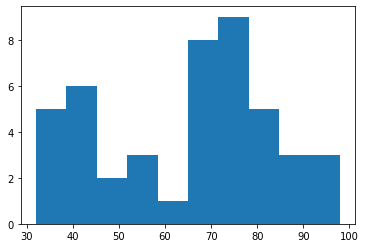

In [9]:
# For each Airbnb listing, we calculate its occupancy rate, month per month, 
# and an annual rate, and we offer our clients a 12-month historical performance for 
# the occupancy rates. Market occupancy rates for a zip code or a neighborhood.
plt.hist(content['detailed']['two_bedrooms_histogram'])

- Again, find sizes of histo data.

### Get Airbnb Super Hosts
#### Obtain a list of all Airbnb market super hosts for a zip code or a city.

In [10]:
# SHORT TERM RENTALS
# Build Query URL - Get Airbnb Super Hosts

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/airbnb-property/super-hosts"

url = url_beginning + url_ending

# Tennessee 
querystring = {
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

content = json_response['content']['super_hosts']

# Build Dataframe

df = pd.DataFrame(content)

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (10, 40)
Columns: Index(['first_name', 'has_profile_pic', 'id', 'picture_url', 'smart_name',
       'thumbnail_url', 'acceptance_rate', 'created_at', 'identity_verified',
       'is_superhost', 'picture_large_url', 'recommendation_count',
       'response_rate', 'response_time', 'reviewee_count',
       'thumbnail_medium_url', 'neighborhood', 'verification_labels',
       'verifications', 'about', 'all_active_phone_numbers', 'friends_count',
       'guidebooks_count', 'has_available_payout_info', 'identity_mt_verified',
       'identity_v2_verified', 'is_generated_user', 'is_trip_host',
       'is_marketplace_cohost', 'languages', 'listings_count', 'location',
       'recent_recommendation', 'recent_review', 'school',
       'show_travel_for_work', 'signup_method', 'total_listings_count',
       'user_flag', 'work'],
      dtype='object')


,first_name,has_profile_pic,id,picture_url,smart_name,thumbnail_url,acceptance_rate,created_at,identity_verified,is_superhost,...,listings_count,location,recent_recommendation,recent_review,school,show_travel_for_work,signup_method,total_listings_count,user_flag,work
0,Michael,True,59668096,https://a0.muscache.com/im/pictures/user/84e48...,Michael,https://a0.muscache.com/im/pictures/user/84e48...,N/A,2016-02-21T04:44:06Z,True,True,...,1,"Palm Harbor, FL",None,{'review': {'comments': 'Expect a beautiful vi...,,True,0,1,NaN,
1,Vivian,True,26179760,https://a0.muscache.com/im/pictures/user/a2ad9...,Vivian,https://a0.muscache.com/im/pictures/user/a2ad9...,N/A,2015-01-16T01:16:29Z,True,True,...,4,"Miami, FL",None,{'review': {'comments': 'Not only is location ...,,False,0,4,NaN,
2,Darron,True,88972889,https://a2.muscache.com/im/pictures/29dd07d2-8...,Darron,https://a2.muscache.com/im/pictures/29dd07d2-8...,N/A,2016-08-09T20:23:14Z,True,True,...,2,"Christiana, TN",None,{'review': {'comments': 'We really enjoyed our...,,NaN,1,2,NaN,
3,CP + Rachel,True,12789161,https://a0.muscache.com/im/pictures/user/64b34...,CP + Rachel,https://a0.muscache.com/im/pictures/user/64b34...,N/A,2014-03-04T13:41:09Z,True,True,...,15,"Austin, TX",None,"{'review': {'comments': 'Good stay!', 'created...",,False,0,15,NaN,
4,Charles,True,13423160,https://a2.muscache.com/im/users/13423160/prof...,NaN,https://a2.muscache.com/im/users/13423160/prof...,0%,2014-03-23T01:33:56Z,True,True,...,4,None,None,{'review': {'comments': 'This is one of the be...,,NaN,0,4,NaN,


- What qualifies someone for this?
- Why can't I find Cloud9 Cabins?
- How can I search and find these users on AirBnB?

In [11]:
# Find Rows with Least Nans
df.isna().sum(axis=1)

0     3
1     3
2     7
3     3
4    12
5    12
6     4
7     4
8     3
9     3
dtype: int64

In [12]:
df.iloc[1]

first_name                                                              Vivian
has_profile_pic                                                           True
id                                                                    26179760
picture_url                  https://a0.muscache.com/im/pictures/user/a2ad9...
smart_name                                                              Vivian
thumbnail_url                https://a0.muscache.com/im/pictures/user/a2ad9...
acceptance_rate                                                            N/A
created_at                                                2015-01-16T01:16:29Z
identity_verified                                                         True
is_superhost                                                              True
picture_large_url            https://a0.muscache.com/im/pictures/user/a2ad9...
recommendation_count                                                         0
response_rate                                       

### Get Neighborhood Historical Performance
#### Get an Airbnb submarket (neighborhood) short term historical performance for its listings as an array
? -> Does this end point belong in the Short Term Rental's Category? <- ?

In [20]:
# SHORT TERM RENTALS
# Build Query URL - Get Airbnb Historical Performance

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/neighborhood/" + str(tn_nb_id) + "/airbnb/details"

url = url_beginning + url_ending

# Tennessee 
querystring = {
    "state": "TN",
    "id": tn_nb_id
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

content = json_response['content']['properties']

# Build Dataframe

df = pd.DataFrame(content)

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (3, 41)
Columns: Index(['id', 'propertyId', 'source', 'status', 'nightPriceـnative',
       'nightPrice', 'weeklyPrice', 'monthlyPrice', 'cleaningFeeNative',
       'numOfBaths', 'numOfRooms', 'occupancy', 'nightsBooked', 'rentalIncome',
       'airbnbNeighborhoodId', 'name', 'address', 'airbnbNeighborhood',
       'airbnbCity', 'state', 'capacityOfPeople', 'zip', 'propertyType',
       'roomType', 'roomTypeCategory', 'amenities', 'reviewsCount',
       'startRating', 'reviews', 'createdAt', 'updatedAt', 'numOfBeds', 'lat',
       'lon', 'image', 'url', 'rental_income', 'neighborhood', 'nightRate',
       'property_id', 'airbnbZIP'],
      dtype='object')


,id,propertyId,source,status,nightPriceـnative,nightPrice,weeklyPrice,monthlyPrice,cleaningFeeNative,numOfBaths,...,numOfBeds,lat,lon,image,url,rental_income,neighborhood,nightRate,property_id,airbnbZIP
0,25152172,11219540,Airbnb,ACTIVE,335,372,0,0,190,3,...,8,35.730091,-83.459160,https://a0.muscache.com/im/pictures/3e0cff88-f...,None,6807.6,"{'id': 18258, 'name': None}",372,11219540,37738
1,25152256,11414584,Airbnb,ACTIVE,140,132,0,0,85,1,...,2,35.756561,-83.465698,https://a0.muscache.com/im/pictures/1ccd481a-8...,None,2890.8,"{'id': 18258, 'name': None}",132,11414584,37738
2,25152395,11697936,Airbnb,ACTIVE,135,146,0,0,85,2,...,3,35.743591,-83.484718,https://a0.muscache.com/im/pictures/83d35763-4...,None,4073.4,"{'id': 18258, 'name': None}",146,11697936,37738


- What is the limit on _this_ data?

### Get Airbnb Newly Listed Homes
#### List all Airbnb homes that are recently listed for a specific location: city, or a zip code.

In [21]:
# SHORT TERM RENTALS
# Build Query URL - Get Airbnb Newly Listed Homes

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/airbnb-property/newly-listed"

url = url_beginning + url_ending

# Tennessee 
querystring = {
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

content = json_response['content']['list']

# Build Dataframe

df = pd.DataFrame(content)

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (2, 104)
Columns: Index(['id', 'city', 'picture_url', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'user_id', 'price', 'native_currency', 'price_native',
       ...
       'weekly_price_factor', 'in_building', 'in_toto_area', 'toto_opt_in',
       'is_business_travel_ready', 'wireless_info', 'exists', 'created_at',
       'host_id', 'airbnb_id'],
      dtype='object', length=104)


,id,city,picture_url,thumbnail_url,medium_url,xl_picture_url,user_id,price,native_currency,price_native,...,weekly_price_factor,in_building,in_toto_area,toto_opt_in,is_business_travel_ready,wireless_info,exists,created_at,host_id,airbnb_id
0,46600876,Gatlinburg,https://a0.muscache.com/im/pictures/b7b73033-a...,https://a0.muscache.com/im/pictures/b7b73033-a...,https://a0.muscache.com/im/pictures/b7b73033-a...,https://a0.muscache.com/im/pictures/b7b73033-a...,376759514,250,USD,250,...,0.8,False,False,None,None,None,True,2020-11-25T05:40:58.396Z,376759514,46600876
1,45770191,Gatlinburg,https://a0.muscache.com/im/pictures/cd0c8ce5-d...,https://a0.muscache.com/im/pictures/cd0c8ce5-d...,https://a0.muscache.com/im/pictures/cd0c8ce5-d...,https://a0.muscache.com/im/pictures/cd0c8ce5-d...,232512508,466,USD,466,...,NaN,False,False,None,None,None,True,2020-11-21T18:42:08.175Z,232512508,45770191


- What is the limit on _this_ data?

## Trends

### Get Top Airbnb Cities
#### Top Airbnb Cities, this endpoint retrieves the cities has the highest occupancy rates with their total Airbnb active listings in a specific state.

In [22]:
# TRENDS
# Build Query URL - Airbnb Top Cities

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/trends/cities"

url = url_beginning + url_ending

querystring = {
    "state": "TN"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()
content = json_response['content']['cities']

df = pd.DataFrame(content)

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (5, 5)
Columns: Index(['city', 'state', 'occupancy', 'total_listing', 'occ_listing'], dtype='object')


,city,state,occupancy,total_listing,occ_listing
0,Nashville,TN,50.661993,10691,541627.366308
1,Chattanooga,TN,63.716942,2516,160311.825908
2,Knoxville,TN,62.282450,709,44158.257050
3,Memphis,TN,64.398027,413,26596.385263
4,Sevierville,TN,71.948200,367,26404.989400


- What does OOC stand for?

## Rental Rates

### Get AirBnb Rental Rates
#### The endpoint retrieves rental income rates for Airbnb or traditional way for a city, zip code, or a neighborhood, you'll be able to fetch Airbnb rental rates - short term rentals, or long term rentals, calculated based on the location Airbnb occupancy rates

In [23]:
# RENTAL RATES
# Build Query URL - Get AirBnb Rental Rates

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/rental-rates"

url = url_beginning + url_ending

querystring = {
    "source": 'airbnb',
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

# Build Dataframe

df = pd.DataFrame(json_response['content']['detailed'])

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (8, 13)
Columns: Index(['state', 'city', 'neighborhood', 'zipcode', 'beds', 'count', 'min',
       'max', 'avg', 'median', 'adjusted_rental_income', 'median_night_rate',
       'median_occupancy'],
      dtype='object')


,state,city,neighborhood,zipcode,beds,count,min,max,avg,median,adjusted_rental_income,median_night_rate,median_occupancy
0,TN,None,None,37738,0,16,1905,4558,3013.375000,2932.5,3316.430556,119.0,83.0
1,TN,None,None,37738,1,35,1374,4040,2932.228571,3001.0,3249.108333,131.0,75.0
2,TN,None,None,37738,2,45,1314,6279,3139.177778,2837.0,3521.641667,158.0,69.0
3,TN,None,None,37738,3,28,1210,7183,3737.857143,3210.5,3377.390625,182.5,58.5
4,TN,None,None,37738,4,25,2411,9976,5980.840000,5805.0,6060.216667,332.0,60.0


- Where does income data come from?

## Investment Analysis

### Get Airbnb Comparable Listings
#### This endpoint retrieves the Airbnb neighborhood's listing data set in Mashvisor database with similarity and distance regarding the target MLS property.

? -> Wht is the Target MLS Property <- ?

In [24]:
# INVESTMENT ANALYSIS
# Build Query URL - Get Airbnb Comparable Listings

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/neighborhood/" + str(tn_nb_id) + "/airbnb/details"

url = url_beginning + url_ending

# Tennessee 
querystring = {
    "state": "TN",
    "id": tn_nb_id
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

content = json_response['content']['properties']

# Build Dataframe

df = pd.DataFrame(content)

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (3, 41)
Columns: Index(['id', 'propertyId', 'source', 'status', 'nightPriceـnative',
       'nightPrice', 'weeklyPrice', 'monthlyPrice', 'cleaningFeeNative',
       'numOfBaths', 'numOfRooms', 'occupancy', 'nightsBooked', 'rentalIncome',
       'airbnbNeighborhoodId', 'name', 'address', 'airbnbNeighborhood',
       'airbnbCity', 'state', 'capacityOfPeople', 'zip', 'propertyType',
       'roomType', 'roomTypeCategory', 'amenities', 'reviewsCount',
       'startRating', 'reviews', 'createdAt', 'updatedAt', 'numOfBeds', 'lat',
       'lon', 'image', 'url', 'rental_income', 'neighborhood', 'nightRate',
       'property_id', 'airbnbZIP'],
      dtype='object')


,id,propertyId,source,status,nightPriceـnative,nightPrice,weeklyPrice,monthlyPrice,cleaningFeeNative,numOfBaths,...,numOfBeds,lat,lon,image,url,rental_income,neighborhood,nightRate,property_id,airbnbZIP
0,25152172,11219540,Airbnb,ACTIVE,335,372,0,0,190,3,...,8,35.730091,-83.459160,https://a0.muscache.com/im/pictures/3e0cff88-f...,None,6807.6,"{'id': 18258, 'name': None}",372,11219540,37738
1,25152256,11414584,Airbnb,ACTIVE,140,132,0,0,85,1,...,2,35.756561,-83.465698,https://a0.muscache.com/im/pictures/1ccd481a-8...,None,2890.8,"{'id': 18258, 'name': None}",132,11414584,37738
2,25152395,11697936,Airbnb,ACTIVE,135,146,0,0,85,2,...,3,35.743591,-83.484718,https://a0.muscache.com/im/pictures/83d35763-4...,None,4073.4,"{'id': 18258, 'name': None}",146,11697936,37738


- ? -> Wht is the Target MLS Property <- ?

In [25]:
json_response['content']['num_of_properties']

218

In [26]:
json_response['content']['avg_occupancy']

64.6835